**Predict the total number of covid cases**


**Performing preprocessing on covid_19 data**


pystan : python interface to stan , it is a platform for statstical modeling and high performance statstical computation.

In [ ]:
!pip install pystan
!pip install fbprophet

In [ ]:
import fbprophet

In [ ]:
from fbprophet import Prophet

In [ ]:
### to check all the function & modules inside Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(r'/covid_19_clean_complete.csv')

In [ ]:
df.head

<bound method NDFrame.head of       Province/State         Country/Region  ...  Active             WHO Region
0                NaN            Afghanistan  ...       0  Eastern Mediterranean
1                NaN                Albania  ...       0                 Europe
2                NaN                Algeria  ...       0                 Africa
3                NaN                Andorra  ...       0                 Europe
4                NaN                 Angola  ...       0                 Africa
...              ...                    ...  ...     ...                    ...
49063            NaN  Sao Tome and Principe  ...     117                 Africa
49064            NaN                  Yemen  ...     375  Eastern Mediterranean
49065            NaN                Comoros  ...      19                 Africa
49066            NaN             Tajikistan  ...    1147                 Europe
49067            NaN                Lesotho  ...     365                 Africa

[49068 ro

In [ ]:
df.shape

Data type of each column.


In [ ]:
df.dtypes

Convert date format it was in object convert it into datetime format
#output
Date              datetime64[ns]

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

To check null values in our data


In [ ]:
df.isnull().sum()

In [ ]:
df['Date'].nunique()

In [ ]:
total=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [ ]:
total.tail()

,Date,Confirmed,Deaths,Recovered,Active
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711
187,2020-07-27,16480485,654036,9468087,6358362


**Renames column names: cuz whatever data we r giving to the model it should be of the form of "ds"(datetime) and what we hv to predict it should be in the form of "y"** 

In [ ]:
df_prophet=total.rename(columns={'Date':'ds','Confirmed':'y'})

**Exactly our training data**

In [ ]:
df_prophet.head

**Intializing and applying prophet model on data**

In [ ]:
m=Prophet()

**Once i'll call this fit model internally this prohet model is able to learn some kind of relationship inside the data**

In [ ]:
model=m.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Create future data for prediction purpose.**

**All feature of our data**


In [ ]:
model.seasonalities

OrderedDict([('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

**Creation of future data for predction**

We have added 30 rows to our data

In [ ]:
### ### now I am going to do forecasting so to do forecasting I need some Future Days 
future_global=model.make_future_dataframe(periods=30,freq='D')

In [ ]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


**Previous there was 188 rows now here 218 rows 30 rows are added as our future data**

In [ ]:
future_global.tail

**Prediction on future data**

In [ ]:
### now do Prediction on future_global
prediction=model.predict(future_global)
prediction

In [ ]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145538e+07,2.106966e+07,2.185650e+07
214,2020-08-23,2.165304e+07,2.123621e+07,2.208216e+07
215,2020-08-24,2.184773e+07,2.141839e+07,2.227637e+07
216,2020-08-25,2.203715e+07,2.158469e+07,2.250588e+07
217,2020-08-26,2.224712e+07,2.176822e+07,2.272347e+07


**Visualization of our prediction**

**Black dots are actual data and blue lines (trend (forecast))is the predicted one this plot showing how the cases will  increase exponentially**

### Conclusion--> This is what our prediction looks like. The direction of overall case numbers is probably true, u will observe how cases rises exponentially

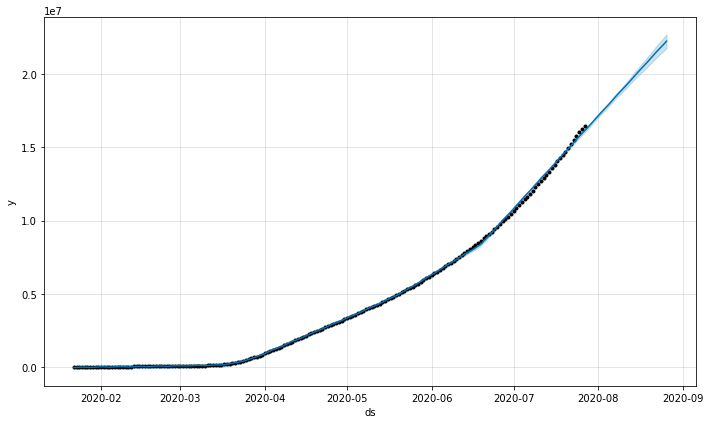

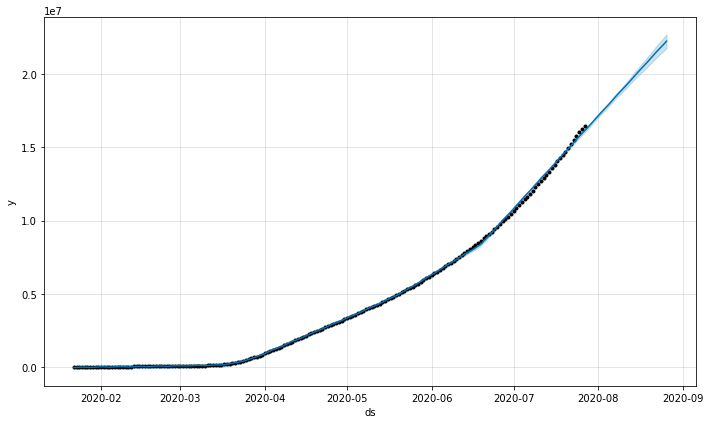

In [ ]:
#### plot the predictions u will see these are with respect to yhat
model.plot(prediction)

Cross validation ur time series data

**##### Visualize Each Components[Trends,Weekly]**

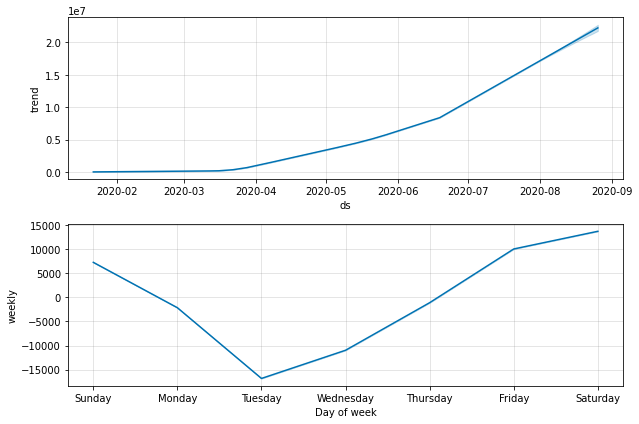

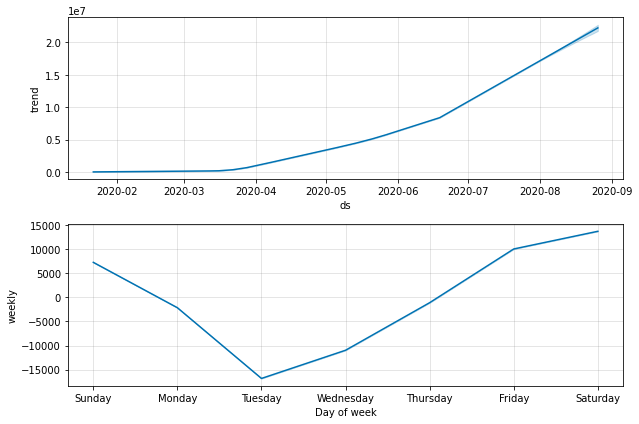

In [ ]:

model.plot_components(prediction)

In [ ]:
#### The prophet model identifies points at which the trend changes and those can be plotted.¶
from fbprophet.plot import add_changepoints_to_plot

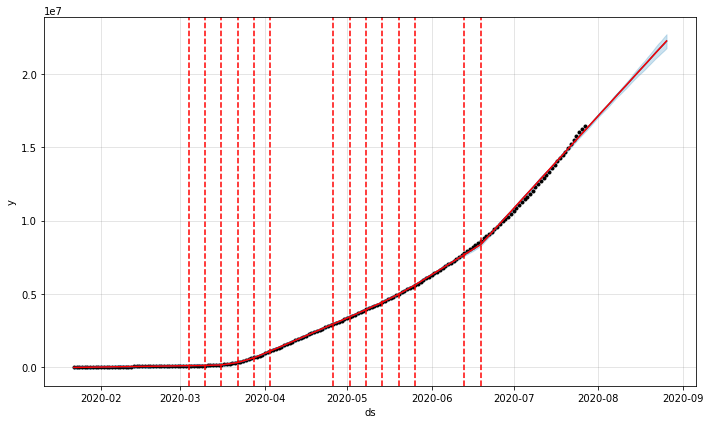

In [ ]:
fig=model.plot(prediction)

a=add_changepoints_to_plot(fig.gca(),model,prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')
## horizon='365 days'--> for how many days we have to cross validate=====

## Computes forecasts from historical cutoff points Beginning from..

## (end - horizon) it means it is going to take that date that is (end - horizon) bcz on these date we have to just 
## cross-validate for the new dataset that we have to find out

## period=180 as from documentation of func as period=0.5*365=180 or {period=1/2*horizon value}
## initial -How many total no. of days we actually want-- 3*365 from documentation of function or  {initial=3*horizon}

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.196120e+06,3.206580e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279218e+06,3.291475e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.362128e+06,3.377558e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.440747e+06,3.461942e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.514879e+06,3.546161e+06,3515244,2020-04-28


In [ ]:
df_cv.shape

(150, 6)

Obtain Performance Metric for my model


#### Obtaining the Performance Metrics
    We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.


In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.721596e+10,164972.604876,129190.213315,0.016867,0.017675,0.000000
1,4 days,3.770271e+10,194171.855844,151379.846239,0.019330,0.022485,0.000000
2,5 days,5.170151e+10,227379.657369,175214.816680,0.021780,0.025717,0.066667
3,6 days,6.937441e+10,263390.225361,202192.647173,0.024558,0.026714,0.133333
4,7 days,9.012810e+10,300213.430311,232530.254272,0.027838,0.031274,0.200000


In [ ]:
from fbprophet.plot import plot_cross_validation_metric

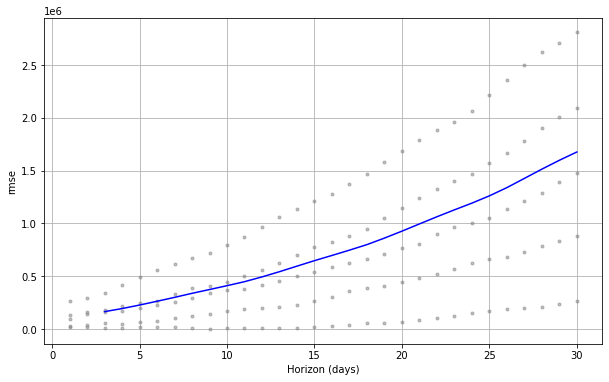

In [ ]:
df_performance=plot_cross_validation_metric(df_cv,metric='rmse')

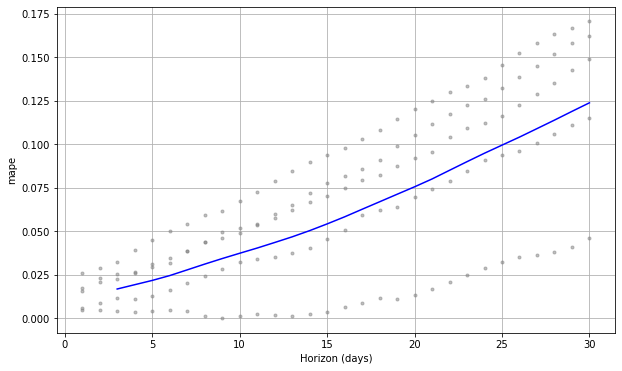

In [ ]:
df_performance=plot_cross_validation_metric(df_cv,metric='mape')